#### Estimator of parameters: frequentist

##### Bias

`Bias` of an estimator $\hat{x}$ of a parameter $x$ (fixed, but unknown) is defined as

$$B(\hat{x})=\mathbb{E}[\hat{x}]-x$$

The expected value is computed over distribution of data, an estimator is said to be unbiased when $B(\hat{x})=0$

##### Variance

`Variance` of an estimator $\hat{x}$ of a parameter $x$ is defined as

$$\text{var}(\hat{x})=\sigma_{\hat{x}}^2=\mathbb{E}\left[\left(\hat{x}-\mathbb{E}[\hat{x}]\right)^2\right]$$

We would like variance to be as small as possible

##### Distribution and likelihood

Assume we have a system with input $x$ and output $y$, and

$$y=x+v, v\sim N(0, \sigma^2)$$

Suppose we obtain a `single` observation $y$, we can write

$$p(y|x)=\frac{1}{\sqrt{2\pi \sigma^2}}\exp \left[-\frac{1}{2\sigma^2}(y-x)^2\right]$$

Here, $x$ is the `parameter` we want to estimate and $y$ is observed value, or `data`

When $x$ is given, this is a probability `distribution` (i.e., PDF) of $y$ parameterized by $x$

However, when $y$ is given, this is a `likelihood function` of parameter $x$ (which is no longer a distribution and does not have to integrate to one over $x$)

The $\hat{x}$ obtained by maximizing this likelihood function is known as `maximum likelihood` estimator (MLE)

From the expression, it is not difficult to see that it (also happens to) minimize the mean squared error (MSE) for Gaussian distribution

$$\hat{x}_{\text{MLE}}=\arg \max_{x}p(y|x) = \arg \min_x (y-x)^2= y$$

Here, the MSE refers to `empirical (sum of) squared residual(s)` bewteen data and the estimator

If we consider $y$ as a random variable (due to noise $v$), we can sample many of them $y_{1:N}$, in this case

$$\begin{align*}\hat{x}_{\text{MLE}}&=\arg \max_x p(y_1, \cdots, y_N|x)\\
&=\arg \max_x \prod_{i=1}^N p(y_i|x) \\
&=\arg \max_x \sum_{i=1}^N \log p(y_i|x) \\
&=\arg \min_x \sum_{i=1}^N (y_i-x)^2 \\
& \text{take derivative w.r.t. x and set to zero} \\
&=\frac{1}{N}\sum_{i=1}^Ny_i
\end{align*}$$

##### MSE of estimator

Consider $y$ as distribution, `MSE of the estimator` is defined as

$$\begin{align*}
\text{MSE}&=\mathbb{E}_{y|x}\left[\left(\hat{x}(y)-x\right)^2\right]\\
&=\int \left(\hat{x}(y)-x\right)^2p(y|x)dy
\end{align*}$$

That is, the `expectation of squared difference` between estimator and true $x$ considering all possible $y$ generated by the distribution parameterized by this $x$

We can evalute this by sampling

$$\begin{align*}
\text{MSE}&=\frac{1}{N}\sum_{i=1}^N\left(\hat{x}(y_i)-x\right)^2
\end{align*}$$

It can be shown that the MLE also minimizes this MSE among all unbiased estimators for Gaussian problem

#### Estimator of parameters: Bayesian

The Bayesian approach considers $x$ a random variable, rather than a fixed but unknown value, with its own distribution

This means in MSE, the expected value will be evaluated over the joint PDF $p(x,y)$

$$\begin{align*}
\text{MSE}(\hat{x})&=\iint \left(\hat{x}-x\right)^2p(x, y)dxdy \\
& \text{split using } p(x, y)=p(x|y)p(y)\\
&=\int \left[\int\left(\hat{x}-x\right)^2p(x|y)dx \right]p(y)dy
\end{align*}$$

Since $p(y)\geq 0$, we can minimize the term in the bracket for each $y$, then the Bayesian MSE will be minimized

We take derivative w.r.t. $\hat{x}$

$$\begin{align*}
\frac{\partial}{\partial \hat{x}}\text{MSE} &\propto\frac{\partial}{\partial \hat {x}}\int (x-\hat{x})^2p(x|y)dx \\
&=\int\frac{\partial}{\partial \hat {x}} (x-\hat{x})^2p(x|y)dx \\
&=-2\int(x-\hat{x})p(x|y)dx \\
&=-2 \int xp(x|y)dx +2\hat{x}\int p(x|y) dx \\
&=-2 \int xp(x|y)dx + 2\hat{x}
\end{align*}$$

Set it to zero and we have

$$\hat{x}=\int x p(x|y)dx=\mathbb{E}[x|y]$$

We see that the estimator minimizing the Bayesian MSE is the mean of the `posterior` PDF $\mathbb{E}[x|y]$, after data has been observed

#### State space tracking

For a system with state $x$ and observation $y$, we define `state space` model $f_n$ and `measurement` model $h_n$ as

$$\begin{align*}x_{n+1}&=f_n(x_n, u_n)\\
y_n&=h_n(x_n, v_n)
\end{align*}$$

Primary goal: estimate state of system $x_n$ at some time step $n$, given a sequence of observations $y_{0:n}$, with $u_n, v_n$ being noise terms

Often, compact notation $\hat{x}_{n|n+l}$ is used, denoting estimate of state at step $n$, based on $y_{0:n+l}$ observations

* when $l=-1$: `predicted` estimate
* when $l=0$: `filtered` estimate (our focus)

We want to do it `recursively`, so we don't have to retain all past measurements

Bayesian estimation is all about finding the `(marginal) posterior` $p(x_n|y_{0:n})$ on top of which we can compute any metric we want, mean, median, whatever

We assume `Markov` property for state space model, that is, if we know what state is at step $n$, then there is no additional information gained from knowing previous values of the state

$$p(x_{n+1}|x_{0:n})=p(x_{n+1}|x_n)$$

Also for measurement model

$$p(y_n|x_{0:n})= p(y_n|x_{n})$$

However

$$p(x_n|y_{0:n})\neq p(x_n|y_{n})$$

#### Joint Bayesian recursion

We can start with joint PDF, the goal is to find a recursive equation from $p(x_{0:n-1}|y_{0:n-1})$ to $p(x_{0:n}|y_{0:n})$

First, we split the following

$$\begin{align*}p(x_{0:n}, y_n|y_{0:n-1})&=p(x_{0:n}|y_n,y_{0:n-1})p(y_n|y_{0:n-1})\\
&=p(x_{0:n}|y_{0:n})p(y_n|y_{0:n-1})
\end{align*}$$

and, we can also do split the other way

$$\begin{align*}p(x_{0:n}, y_n|y_{0:n-1})&=p(y_n|y_{0:n-1}, x_{0:n})p(x_{0:n}|y_{0:n-1}) \\
& \text{Markov property} \\
&=p(y_n|x_n)p(x_{0:n}|y_{0:n-1})\\
&=p(y_n|x_n)p(x_n, x_{0:n-1}|y_{0:n-1})\\
& \text{split the second term} \\
&=p(y_n|x_n)p(x_n|x_{0:n-1}, y_{0:n-1})p(x_{0:n-1}|y_{0:n-1})\\
& \text{Markov property} \\
&=p(y_n|x_n)p(x_n|x_{n-1})p(x_{0:n-1}|y_{0:n-1})\\
\end{align*}$$

Combine two results, we have our recursive equation for joint posterior PDF

$$p(x_{0:n}|y_{0:n})=p(x_{0:n-1}|y_{0:n-1})\frac{p(y_n|x_n)p(x_n|x_{n-1})}{p(y_n|y_{0:n-1})}$$

with likelihood $p(y_n|x_n)$ and prior $p(x_n|x_{n-1})$ in the numerator, and the denominator is a normalizing constant not related to the state

In theory, we can obtain the marginal through integration

$$p(x_n|y_{0:n})=\int p(x_{0:n}|y_{0:n})dx_{0:n-1}$$

But it beats the purpose of not having to computing the joint PDF in the first place

#### Marginal Bayesian recursion

Now, we start directly with marginal, and split it in two ways (with Markov property)

$$\begin{align*}
p(x_n, y_n|y_{0:n-1})&=p(x_n|y_n,y_{0:n-1})p(y_n|y_{0:n-1})\\
&=p(x_n|y_{0:n})p(y_n|y_{0:n-1})\\
p(x_n, y_n|y_{0:n-1})&=p(y_n|x_n,y_{0:n-1})p(x_n|y_{0:n-1})\\
&=p(y_n|x_n)p(x_n|y_{0:n-1})\\
\end{align*}$$

Combine these two, we have

$$p(x_n|y_{0:n})=\frac{p(y_n|x_n)p(x_n|y_{0:n-1})}{p(y_n|y_{0:n-1})}$$

where $p(y_n|x_n)$ is the likelihood, and $p(y_n|y_{0:n-1})$ does not depend on $x_n$

Now, we deal with $p(x_n|y_{0:n-1})$

$$\begin{align*}
p(x_n|y_{0:n-1})&=\int p(x_n, x_{n-1}|y_{0:n-1})dx_{n-1}\\
&=\int p(x_n| x_{n-1},y_{0:n-1})p(x_{n-1}|y_{0:n-1})dx_{n-1}\\
&\text{Markov property}\\
&=\int p(x_n| x_{n-1})p(x_{n-1}|y_{0:n-1})dx_{n-1}\\
\end{align*}$$

We see we have the prior $p(x_n| x_{n-1})$ and posterior from previous step $p(x_{n-1}|y_{0:n-1})$

So in summary, for marginal Bayesian recursion, we have

* `Prediction` step

$$\begin{align*}
p(x_n|y_{0:n-1})=\int p(x_n| x_{n-1})p(x_{n-1}|y_{0:n-1})dx_{n-1}\\
\end{align*}$$

* `Update` step

$$p(x_n|y_{0:n})=\frac{p(y_n|x_n)}{p(y_n|y_{0:n-1})}p(x_n|y_{0:n-1})$$

These are elegant equations, but not useful if the integral is impossible to evaluate

#### Numerical integration

Suppose we wish to evaluate the integral

$$\begin{align*}
p(x_n|y_{0:n-1})=\int_{x_{\min}}^{x_{\max}} p(x_n| x_{n-1})p(x_{n-1}|y_{0:n-1})dx_{n-1}\\
\end{align*}$$

We can write the approximation of the integral using trapezoidal rule with $n_{b}$ bins

$$\begin{align*}
p(x_n|y_{0:n-1})&=\int_{x_{\min}}^{x_{\max}} p(x_n| x_{n-1})p(x_{n-1}|y_{0:n-1})dx_{n-1}\\
&=\int_{x_{\min}}^{x_{\max}} g(x;x_n)dx \\
&\approx d\left[\frac{g(x_{\min};x_n)+g(x_{\max};x_n)}{2}+\sum_{k=1}^{n_b-1}g(x_{\min}+kd;x_n)\right]
\end{align*}$$

where $d=(x_{\max}-x_{\min})/n_b$ is the width of each bin

##### 1D Single mode example

$$\begin{align*}
x_{n+1}&=\alpha x_n+u_n \\
y_n&=\beta x_n^3+v_n
\end{align*}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

In [2]:
# Integration using trapezoidal rule

# Integrates once over entire domain of x
def trapz(y, x):
    return np.sum(0.5 * (x[1:] - x[:-1]) * (y[1:] + y[:-1]))

# Integrates from x[0] to every x[i] for i=1 to n
def cumtrapz(y, x):
    out = np.zeros_like(y)
    for i in range(1, len(y)):
        out[i] = out[i-1] + 0.5*(x[i] - x[i-1])*(y[i] + y[i-1])
    return out

In [3]:
n_step = 201
x_min = -3.0
x_max = 3.0
sigma_u = 0.2
sigma_v = 0.1
n_bin = 1000
alpha = 0.995
beta = 0.1

In [4]:
# Generate ground truth state and observation trajectory
np.random.seed(42)

x_true = np.zeros(n_step + 1) # scalar at each step
y = np.zeros(n_step) # scalar at each step

x_true[0] = np.random.randn() * sigma_u # scalar

for n in range(n_step):
    x_true[n+1] = alpha * x_true[n] + np.random.randn() * sigma_u # scalar
    y[n] = beta * x_true[n]**3 + np.random.randn() * sigma_v # scalar

# Remember, we want to use y[0:n] to infer x[n]
x_true = x_true[:n_step]

In [5]:
x_grid = np.linspace(x_min, x_max, n_bin)
width = x_grid[1] - x_grid[0]

posterior_filtered = np.zeros((n_bin, n_step))
posterior_predicted = np.zeros(n_bin)

# scalar at each step
x_median = np.zeros(n_step)
x_lower = np.zeros(n_step)
x_upper = np.zeros(n_step)

Initial update step

In [6]:
# Discretized prior PDF at n=0, a vector
prior_0 = norm.pdf(x_grid, loc=0.0, scale=sigma_u)

# Likelihood of points on x_grid, given data y[0], a vector
# Intuitively, if state were points on x_grid, how likely we observe y[0]
likelihood_0 = norm.pdf(y[0], loc=beta * x_grid**3, scale=sigma_v)

# Unnormalized posterior, a vector
posterior_filtered[:, 0] = likelihood_0 * prior_0

# Normalized posterior, a vector
normalizing_const = trapz(posterior_filtered[:, 0], x_grid)
posterior_filtered[:, 0] /= normalizing_const

Key step in the recursion is the prediction step

$$\begin{align*}
p(x_n|y_{0:n-1})=\int_{x_{\min}}^{x_{\max}} p(x_n| x_{n-1})p(x_{n-1}|y_{0:n-1})dx_{n-1}\\
\end{align*}$$

Since the update step is basically the same as above

Context for prediction step
* We keep a discrete grid `x_grid`
* `posterior_filtered[: n-1]` is our discrete approximation of posterior in previous step
* We want to compute $p(x_n|y_{0:n-1})$ for each discrete point on `x_grid`

In [7]:
# Recursion
for n in range(1, n_step):
    # Vectorize
    # Each row prior_mat[i,:] corresponds to transition probability PDF
    # from all previous states x_{n-1} to new state x_grid[i]
    prior_mat = norm.pdf(
        x_grid[:, None], # (n_bin,1) "x_n"
        loc=alpha * x_grid[None, :], # (1,n_bin) "alpha*x_{n-1}"
        scale=sigma_u
    )

    old_posterior = posterior_filtered[:, n-1] # vector

    # Use rectangle rule approximation, for sake of vectorization
    # Integration is done row-wise
    posterior_predicted = (prior_mat @ old_posterior) * width # vector

    likelihood_n = norm.pdf(y[n], loc=beta * x_grid**3,  scale=sigma_v)

    # Unnormalized (current) posterior
    posterior_filtered[:, n] = likelihood_n * posterior_predicted

    # Normalize
    normalizing_const = trapz(posterior_filtered[:, n], x_grid)
    posterior_filtered[:, n] /= normalizing_const

    # CDF
    cdf_posterior = cumtrapz(posterior_filtered[:, n], x_grid)

    # Find median
    idx_median = np.where(cdf_posterior <= 0.5)[0]
    if len(idx_median) == 0:
        idx_median = 0
    else:
        idx_median = idx_median[-1]

    # 95% confidence interval
    idx_lower = np.where(cdf_posterior <= 0.025)[0]
    idx_upper = np.where(cdf_posterior >= 0.975)[0]

    idx_lower = idx_lower[-1] if len(idx_lower) else 0
    idx_upper = idx_upper[0]  if len(idx_upper) else (n_bin - 1)

    x_median[n] = x_grid[idx_median]
    x_lower[n] = x_grid[idx_lower]
    x_upper[n] = x_grid[idx_upper]

# Mode
i_max = np.argmax(posterior_filtered, axis=0)
x_mode = x_grid[i_max]

# Mean
x_mean = np.sum(x_grid[:, None] * posterior_filtered, axis=0) * width

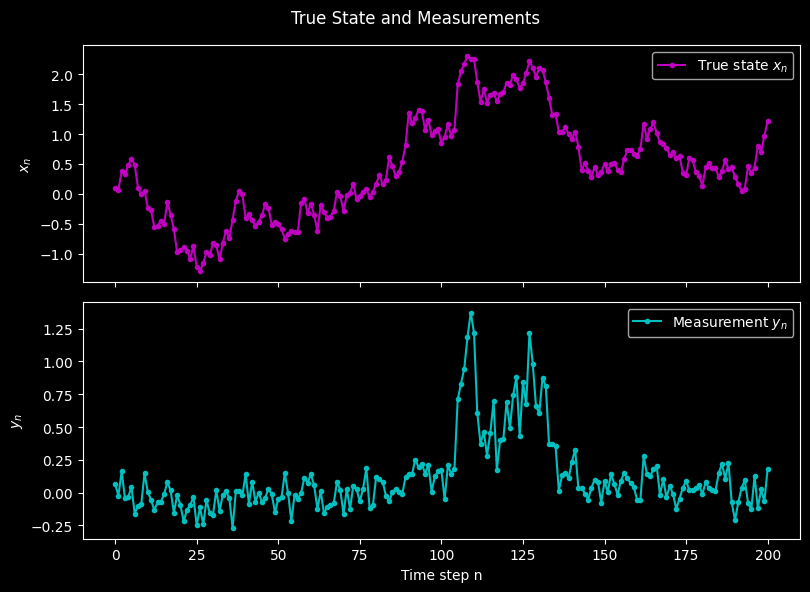

In [8]:
# True state x_n and measurements y_n
fig_1, ax_1 = plt.subplots(2, 1, sharex=True, figsize=(8,6))

ax_1[0].plot(range(n_step), x_true, 'm.-', label='True state $x_n$')
ax_1[0].set_ylabel('$x_n$')
ax_1[0].legend(loc='best')

ax_1[1].plot(range(n_step), y, 'c.-', label='Measurement $y_n$')
ax_1[1].set_xlabel('Time step n')
ax_1[1].set_ylabel('$y_n$')
ax_1[1].legend(loc='best')

plt.suptitle('True State and Measurements')
plt.tight_layout()
plt.show()

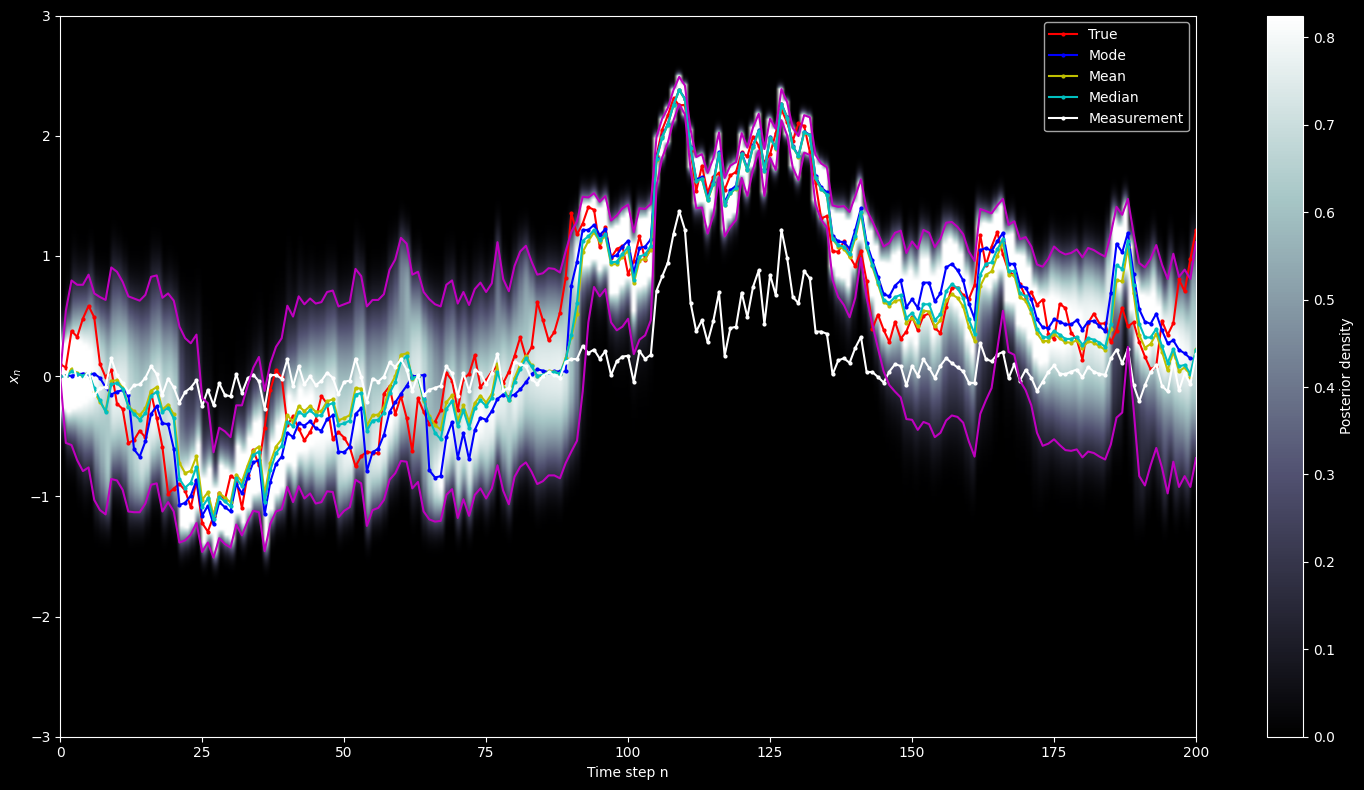

In [10]:
# Posterior (filtered)
fig_2, ax_2 = plt.subplots(figsize=(15,8))

im = ax_2.imshow(
    posterior_filtered,
    origin='lower',
    aspect='auto',
    extent=[0, n_step - 1, x_min, x_max],
    cmap='bone'
)

cmax = np.percentile(posterior_filtered, 95)
im.set_clim([0, cmax])

n_grid = np.arange(n_step)
ax_2.plot(n_grid, x_true, 'r.-', label='True', markersize=4)
ax_2.plot(n_grid, x_mode, 'b.-', label='Mode', markersize=4)
ax_2.plot(n_grid, x_mean, 'y.-', label='Mean', markersize=4)
ax_2.plot(n_grid, x_median, 'c.-', label='Median', markersize=4)
ax_2.plot(n_grid, y, 'w.-', label='Measurement', markersize=4)

ax_2.plot(n_grid, x_lower, 'm')
ax_2.plot(n_grid, x_upper, 'm')

ax_2.set_xlim([0, n_step - 1])
ax_2.set_ylim([x_min, x_max])
ax_2.set_xlabel('Time step n')
ax_2.set_ylabel('$x_n$')

cbar = plt.colorbar(im)
cbar.set_label('Posterior density')

ax_2.legend(loc='upper right')
plt.tight_layout()
plt.show()